<a href="https://colab.research.google.com/github/Elisha-Hart/Access-The-String-Using-Slicing-And-Indexing-Assignment/blob/main/EDA_Univariate_Cross_Validation_Pipeline_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [630]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import collections
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import seaborn as sns 

In [631]:
data = pd.read_csv("/content/gender_submission.csv")

In [632]:
### Data Quality Checking
def quality_check(data):
  print("Data Information Is :", data.info())
  print("Data Description Is :", data.describe())
  print("Data columns are : ", data.columns)
  print("The null counts are: ", data.isnull().sum())

In [633]:
print("The quality report of the data is as follows \n", quality_check(data))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
Data Information Is : None
Data Description Is :        PassengerId    Survived
count   418.000000  418.000000
mean   1100.500000    0.363636
std     120.810458    0.481622
min     892.000000    0.000000
25%     996.250000    0.000000
50%    1100.500000    0.000000
75%    1204.750000    1.000000
max    1309.000000    1.000000
Data columns are :  Index(['PassengerId', 'Survived'], dtype='object')
The null counts are:  PassengerId    0
Survived       0
dtype: int64
The quality report of the data is as follows 
 None


In [634]:
index = data["PassengerId"].astype(object).value_counts().sort_values(ascending = False).head(10).index


In [635]:
data["PassengerId"].astype(object)

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: object

In [636]:
data["PassengerId"].astype(object).value_counts().sort_values(ascending= False)

892     1
995     1
895     1
896     1
897     1
       ..
1306    1
1307    1
1308    1
1298    1
1309    1
Name: PassengerId, Length: 418, dtype: int64

In [637]:
data["PassengerId"].astype(object).value_counts().sort_values(ascending= False).head(10)

892    1
995    1
895    1
896    1
897    1
898    1
899    1
900    1
901    1
902    1
Name: PassengerId, dtype: int64

In [638]:
data["PassengerId"].astype(object).value_counts().sort_values(ascending= False).head(10).index

Int64Index([892, 995, 895, 896, 897, 898, 899, 900, 901, 902], dtype='int64')

In [639]:
data["PassengerId"].astype(object).value_counts().sort_values(ascending= False).head(10).values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [640]:
data["PassengerId"].astype(object).value_counts()

892     1
1205    1
1177    1
1176    1
1175    1
       ..
1028    1
1027    1
1026    1
1025    1
1309    1
Name: PassengerId, Length: 418, dtype: int64

In [641]:
def plot_categorical_data(index, values):
  plt.figure(figsize = [20,8])
  plt.subplot(1,2,1)
  plt.pie(x = values, labels = index, autopct='%1.0f%%')
  plt.subplot(1,2,2)
  sns.barplot(y = index, x = values, orient = "h")
  plt.grid();
  plt.show()

**EDA-Univariate**


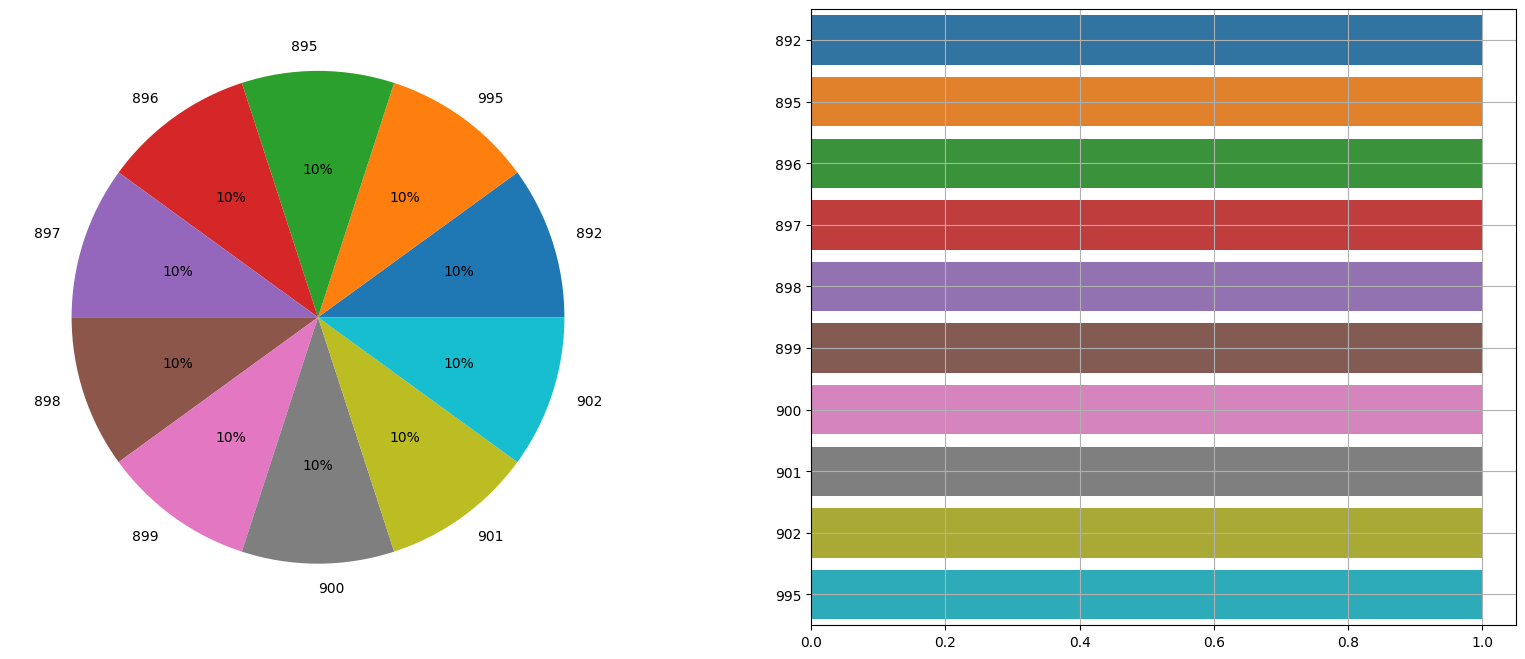

In [642]:
index = data["PassengerId"].astype(object).value_counts().sort_values(ascending = False).head(10).index
values = data["PassengerId"].astype(object).value_counts().sort_values(ascending = False).head(10).values
plot_categorical_data(index, values)



In [643]:
def plot_continious_data(data, col):
  plt.figure(figsize = [20,8])
  plt.subplot(1,2,1)
  plt.hist(data)
  plt.subplot(1,2,2)
  sns.boxplot(y = col, data=data)
  plt.grid();
  plt.show();

**EDA** 


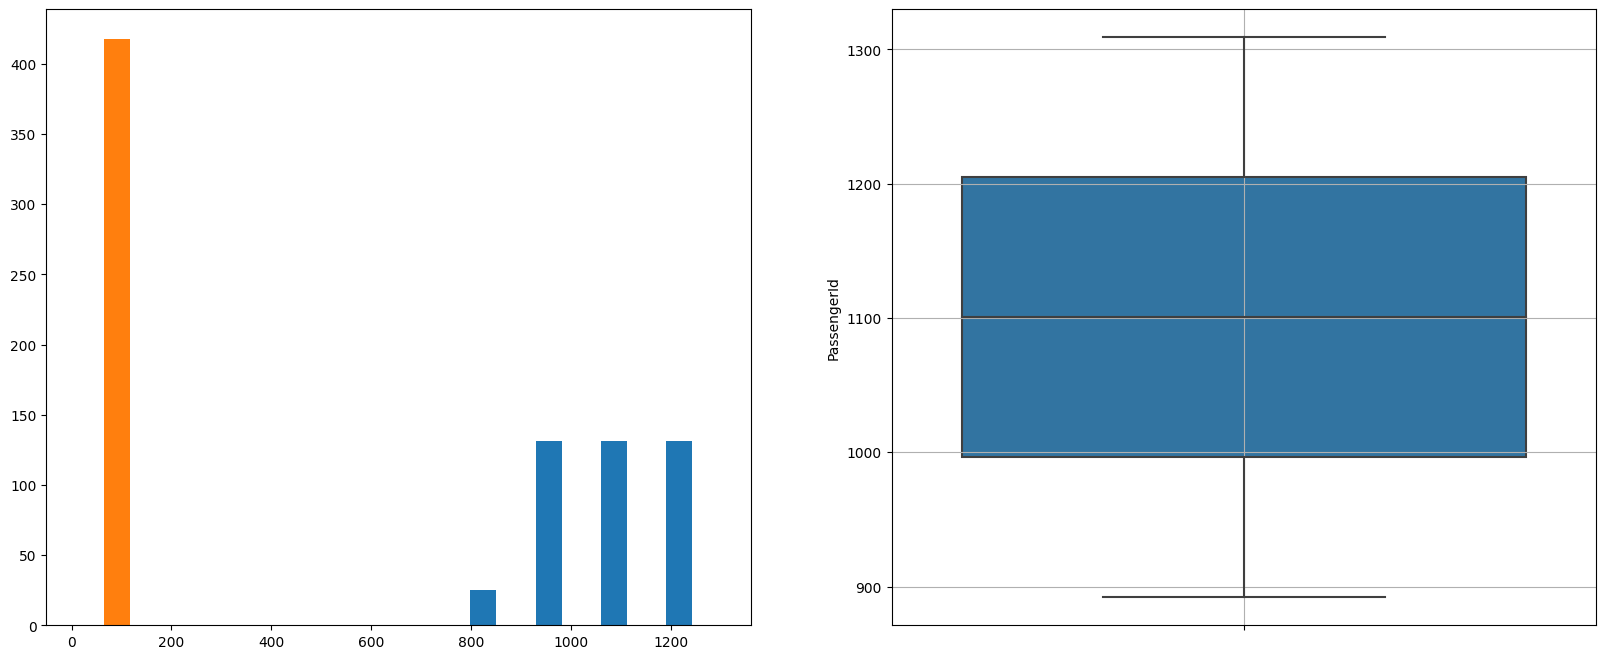

In [644]:
plot_continious_data (data, "PassengerId")


In [645]:
data.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [646]:
data['Survived']

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [647]:
data['Survived'].max()

1

In [648]:
data['Survived'].min()

0

In [649]:
data.groupby(by = ['PassengerId'])['Survived'].count()

PassengerId
892     1
893     1
894     1
895     1
896     1
       ..
1305    1
1306    1
1307    1
1308    1
1309    1
Name: Survived, Length: 418, dtype: int64

In [650]:
data.groupby(by = ['PassengerId'])['Survived'].mean()

PassengerId
892     0.0
893     1.0
894     0.0
895     0.0
896     1.0
       ... 
1305    0.0
1306    1.0
1307    0.0
1308    0.0
1309    0.0
Name: Survived, Length: 418, dtype: float64

In [651]:
np.median(data['PassengerId'])

1100.5

<Axes: xlabel='PassengerId', ylabel='Count'>

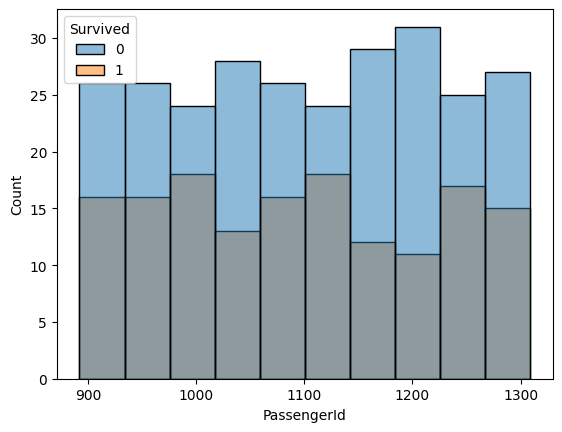

In [652]:
sns.histplot(x = 'PassengerId', data=data, hue = "Survived")


In [653]:
data.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [654]:
data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [655]:
data.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [656]:
from sklearn.model_selection import train_test_split as tts
X,y = data.drop(["Survived"], axis = 1), data["Survived"]

In [657]:
X_train, X_test, y_train, y_test = tts(X,y, test_size = 0.25)

In [658]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((313, 1), (105, 1), (313,), (105,))

In [659]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [660]:
# Begin the Logistic Regression Training
log_reg.fit(X_train, y_train)

LogisticRegression()

In [661]:
predictions_log_reg = log_reg.predict(X_test)

In [662]:
# Training the KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [663]:
predictions_knn = knn.predict(X_test)

In [664]:
results_df = pd.DataFrame({"Actual_Predictions":y_test,
                           "log_reg_predictions":predictions_log_reg,
                           "KNN_predictions":predictions_knn})

In [665]:
results_df

,Actual_Predictions,log_reg_predictions,KNN_predictions
298,0,0,0
210,0,0,0
223,0,0,0
301,0,0,0
60,0,0,0
...,...,...,...
363,0,0,1
9,0,0,0
359,1,0,0
17,0,0,0


In [666]:
from sklearn.model_selection import GridSearchCV
param_grid = {'penalty':["l1", "l2", "elasticnet", None],
              'dual':[True,False]}
              

In [667]:
grid_search = GridSearchCV

In [668]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)



GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [669]:
param_grid


{'penalty': ['l1', 'l2', 'elasticnet', None], 'dual': [True, False]}

In [670]:
grid_search

sklearn.model_selection._search.GridSearchCV

In [671]:
grid_search.fit

<function sklearn.model_selection._search.BaseSearchCV.fit(self, X, y=None, *, groups=None, **fit_params)>

In [672]:
print(clf.best_params_)

{'C': 1, 'kernel': 'linear'}


In [673]:
forest_params = [{'max_depth': list(range(10,15)), 'max_features': list(range(0,14))}]

clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [674]:
best_model = LogisticRegression({'dual':False, 'penalty': '12'})

In [675]:
best_model.fit

<bound method LogisticRegression.fit of LogisticRegression(penalty={'dual': False, 'penalty': '12'})>

**Creating New Features**

In [676]:
from sklearn import preprocessing
data = load_iris()

X_data = data.data
target = data.target

standard = preprocessing.scale(X_data)
print(standard)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

In [677]:
from sklearn.datasets import load_iris

In [678]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

data = load_iris()
scale = StandardScaler()

X_data = data.data
target = data.target

scaled_data = scale.fit_transform(X_data)
print(scaled_data)



[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

In [679]:
pd.DataFrame(scaled_data)

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [680]:
scaled_data

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [681]:
scaled_df = pd.DataFrame

In [682]:
scaled_df = pd.DataFrame(scaled_data)

In [683]:
X

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [684]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [685]:
y.shape

(418,)

In [686]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [687]:
X_train

,PassengerId
82,974
165,1057
362,1254
79,971
351,1243
...,...
372,1264
401,1293
62,954
200,1092


In [688]:
y_train.shape, y_test.shape

((334,), (84,))

In [689]:
y_train.values

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,

In [690]:
X.shape

(418, 1)

In [691]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()



In [692]:
model.fit

<bound method LogisticRegression.fit of LogisticRegression()>

In [693]:
model

LogisticRegression()

In [694]:
model.predict

<bound method LinearClassifierMixin.predict of LogisticRegression()>

In [695]:
y_test.values

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0])

In [696]:
X_test.values

array([[1168],
       [1294],
       [1025],
       [ 921],
       [1065],
       [1125],
       [1106],
       [1060],
       [1010],
       [1049],
       [1111],
       [1235],
       [ 977],
       [1054],
       [1214],
       [1104],
       [1078],
       [1027],
       [1278],
       [1276],
       [1182],
       [1219],
       [1011],
       [ 967],
       [ 969],
       [ 976],
       [1298],
       [ 984],
       [1176],
       [1202],
       [ 950],
       [1210],
       [1154],
       [1279],
       [1261],
       [1165],
       [1220],
       [ 978],
       [1213],
       [ 979],
       [1141],
       [ 928],
       [1186],
       [1284],
       [1029],
       [1149],
       [1257],
       [ 988],
       [ 907],
       [1098],
       [1223],
       [1030],
       [ 893],
       [1001],
       [ 959],
       [ 998],
       [1133],
       [1148],
       [1201],
       [1005],
       [1292],
       [ 913],
       [1072],
       [ 933],
       [1051],
       [1296],
       [12

In [697]:
from sklearn import neighbors, datasets
iris = datasets.load_iris()
X,y = iris.data, iris.target
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
print(iris.target_names[knn.predict([[3,5,4,2]])])



['virginica']


In [698]:
from sklearn.linear_model import LinearRegression

X = 30 * np.random.random((20,1))

y = 0.5 * X + 1.0 + np.random.normal(size=X.shape)

model = LinearRegression()
model.fit(X,y)

X_new = np.linspace(0, 30, 100)
y_new = model.predict(X_new[:, np.newaxis])

In [699]:
from sklearn.datasets import load_digits
digits = load_digits()

In [700]:
print(model.predict)

<bound method LinearModel.predict of LinearRegression()>


In [701]:
model.predict
print(X_test)

     PassengerId
276         1168
402         1294
133         1025
29           921
173         1065
..           ...
263         1155
397         1289
95           987
254         1146
5            897

[84 rows x 1 columns]


In [702]:
predicted_data = pd.DataFrame(y_test.values)

In [703]:
predicted_data

,0
0,0
1,1
2,0
3,0
4,0
...,...
79,1
80,1
81,0
82,0


In [704]:
predicted_data.reset_index()

,index,0
0,0,0
1,1,1
2,2,0
3,3,0
4,4,0
...,...,...
79,79,1
80,80,1
81,81,0
82,82,0


In [705]:
predicted_data.reset_index(inplace = True)

In [706]:
columns = ["Actual_Survived", "Predicted_survived"]
predicted_data.columns = columns

In [707]:
predicted_data

,Actual_Survived,Predicted_survived
0,0,0
1,1,1
2,2,0
3,3,0
4,4,0
...,...,...
79,79,1
80,80,1
81,81,0
82,82,0


In [708]:
from sklearn import datasets

In [709]:
from sklearn import svm

In [710]:
X,y = datasets.load_iris(return_X_y=True)

In [711]:
X.shape, y.shape

((150, 4), (150,))

In [712]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0
)


In [713]:
X_train.shape, y_train.shape

((90, 4), (90,))

In [714]:
X_test.shape, y_test.shape

((60, 4), (60,))

In [715]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

In [716]:
clf.score(X_test, y_test)

0.9666666666666667

In [717]:
from sklearn.model_selection import cross_val_score

In [718]:
clf = svm.SVC(kernel='linear', C=1, random_state=42)

**Cross Validation**


In [719]:
scores = cross_val_score(clf, X, y, cv=5)

In [720]:
scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [721]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.02


In [722]:
from sklearn.pipeline import make_pipeline

In [723]:
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))

In [724]:
from sklearn.model_selection import ShuffleSplit

In [725]:
n_samples = X.shape[0]

In [726]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

In [727]:
cross_val_score(clf, X, y, cv=cv)

array([0.97777778, 0.93333333, 0.95555556, 0.93333333, 0.97777778])

In [728]:
from sklearn.pipeline import make_pipeline

In [729]:
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))

**Pipelining**

In [730]:
cross_val_score(clf, X, y, cv=cv)

array([0.97777778, 0.93333333, 0.95555556, 0.93333333, 0.97777778])

In [731]:
import numpy as np
from sklearn.model_selection import KFold

In [732]:
X = ["a", "b", "c", "d"]

In [733]:
kf = KFold(n_splits=2)

In [734]:
for train, test in kf.split(X):
  print("%s %s" % (train, test))

[2 3] [0 1]
[0 1] [2 3]


In [735]:
X = np.array([[0., 0.], [1., 1.], [-1., -1.], [2., 2.]])

In [736]:
y = np.array([0, 1, 0, 1])

In [737]:
X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]

In [738]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [739]:
X, y = make_classification(n_samples=1000, n_classes=3, n_features=20, n_informative=3, random_state=42)

In [740]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [741]:
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

In [742]:
fpr = {}
tpr = {}
thresh = {}

n_class = 3

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
  

**ROC Curve**

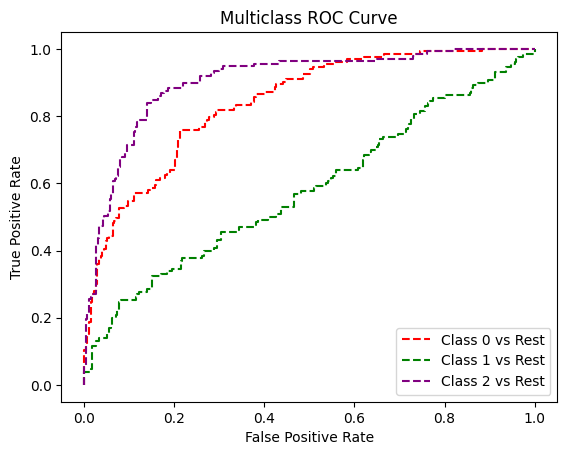

In [743]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='purple', label='Class 2 vs Rest')
plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)


In [744]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [745]:
X_train, X_test, y_train, y_test 

(array([[ 1.63828118, -0.16557897, -1.54826167, ...,  0.83498943,
          1.83794203,  0.53746209],
        [ 1.202249  ,  0.26905269,  0.28638674, ...,  0.53289172,
         -1.4512263 , -0.4134487 ],
        [ 0.88169643, -0.51442582,  0.986514  , ..., -0.06711639,
          1.93946355, -1.32123374],
        ...,
        [-0.03193389, -0.30031814,  1.37079183, ...,  1.92494051,
         -1.55876225, -0.41723484],
        [ 0.69285758, -0.79994051,  1.00163183, ...,  0.14304877,
          0.53629091, -0.39305276],
        [ 0.10527862, -1.50304686,  0.0903098 , ...,  0.18301293,
          0.4664446 , -0.88143371]]),
 array([[ 2.77996362, -1.35375467, -0.23527391, ..., -1.16948063,
          0.07567354, -2.07711985],
        [-0.26030904, -0.22053823,  0.22328091, ...,  0.18847576,
         -0.27241002,  0.54028794],
        [-0.18820244, -0.21387517,  0.22058354, ...,  0.11339439,
         -1.74277197,  0.41875996],
        ...,
        [-0.84928096, -2.40194694, -2.84394366, ..., -

In [746]:
rfc = RandomForestClassifier()

In [747]:
forest_params = [{'max_depth': list(range(10, 15)), 'max_features':list(range(0,14))}]

In [748]:
clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')